In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'EL'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-09-30,2631,-537,2094,229,1395,1502,1257,4728,894,...,516,0,14,1942,1319,3884,128,-79,385.7,2014-11-01
1,2014-12-31,3045,-573,2471,438,1241,1399,1112,4426,993,...,495,0,69,2045,1321,4039,866,-109,385.7,2015-02-01
2,2015-03-31,2581,-503,2078,273,1288,1350,1073,4429,1147,...,498,0,135,2098,1318,4240,391,-92,385.7,2015-05-02
3,2015-06-30,2524,-488,2036,154,1021,1175,1216,4184,1145,...,635,0,30,2130,1595,4584,558,-193,385.7,2015-08-19
4,2015-09-30,2835,-577,2258,311,409,1539,1177,4384,1145,...,515,0,454,2455,1613,4935,8,-90,376.6,2015-11-01


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2023-09-30,2023-11-01,360.8,3518,-1070,2448,36,3090,1909,2863,...,5515,22650,1257,0,1005,5914,7088,17308,-408,-295
37,2023-12-31,2024-02-01,360.8,4280,-1154,3126,324,3939,1752,2603,...,5554,23283,1252,0,1500,6574,6640,17571,1345,-232
38,2024-03-31,2024-05-02,360.8,3940,-1107,2833,335,3701,1854,2307,...,5438,22700,1197,0,505,5416,7265,16956,534,-175
39,2024-06-30,2024-08-19,360.8,3871,-1092,2779,-286,3395,1727,2175,...,5183,21677,1440,0,504,5702,7239,16363,889,-217
40,2024-09-30,2024-10-28,359.6,3361,-928,2433,-156,2350,1977,2255,...,5207,21317,1135,0,504,5486,7311,16233,-670,-141


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-09-30,2023-11-01,360.8,3518,-1070,2448,36,3090,1909,2863,...,22650,1257,0,1005,5914,7088,17308,-408,-295,1
37,2023-12-31,2024-02-01,360.8,4280,-1154,3126,324,3939,1752,2603,...,23283,1252,0,1500,6574,6640,17571,1345,-232,1
38,2024-03-31,2024-05-02,360.8,3940,-1107,2833,335,3701,1854,2307,...,22700,1197,0,505,5416,7265,16956,534,-175,1
39,2024-06-30,2024-08-19,360.8,3871,-1092,2779,-286,3395,1727,2175,...,21677,1440,0,504,5702,7239,16363,889,-217,1
40,2024-09-30,2024-10-28,359.6,3361,-928,2433,-156,2350,1977,2255,...,21317,1135,0,504,5486,7311,16233,-670,-141,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-09-30,2023-11-01,360.8,3518.0,-1070.0,2448.0,36.0,3090.0,1909.0,2863.0,...,22650.0,1257.0,0.0,1005.0,5914.0,7088.0,17308.0,-408.0,-295.0,1
37,2023-12-31,2024-02-01,360.8,4280.0,-1154.0,3126.0,324.0,3939.0,1752.0,2603.0,...,23283.0,1252.0,0.0,1500.0,6574.0,6640.0,17571.0,1345.0,-232.0,1
38,2024-03-31,2024-05-02,360.8,3940.0,-1107.0,2833.0,335.0,3701.0,1854.0,2307.0,...,22700.0,1197.0,0.0,505.0,5416.0,7265.0,16956.0,534.0,-175.0,1
39,2024-06-30,2024-08-19,360.8,3871.0,-1092.0,2779.0,-286.0,3395.0,1727.0,2175.0,...,21677.0,1440.0,0.0,504.0,5702.0,7239.0,16363.0,889.0,-217.0,1
40,2024-09-30,2024-10-28,359.6,3361.0,-928.0,2433.0,-156.0,2350.0,1977.0,2255.0,...,21317.0,1135.0,0.0,504.0,5486.0,7311.0,16233.0,-670.0,-141.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-11-03,64.306381,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.493215,0.506785,0.0,0.0,0.0,0.0,0.795895,0.087039,0.0,0.0
1,2014-11-10,63.198902,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.493215,0.506785,0.0,0.0,0.0,0.0,0.795895,0.087039,0.0,0.0
2,2014-11-17,64.713974,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.493215,0.506785,0.0,0.0,0.0,0.0,0.795895,0.087039,0.0,0.0
3,2014-11-24,65.688553,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.493215,0.506785,0.0,0.0,0.0,0.0,0.795895,0.087039,0.0,0.0
4,2014-12-01,66.368210,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.493215,0.506785,0.0,0.0,0.0,0.0,0.795895,0.087039,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-11-03,64.306381,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.0,0.795895,0.087039,0.0,0.0,inf,6.561633,inf,inf,inf
1,2014-11-10,63.198902,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.0,0.795895,0.087039,0.0,0.0,inf,6.448629,inf,inf,inf
2,2014-11-17,64.713974,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.0,0.795895,0.087039,0.0,0.0,inf,6.603222,inf,inf,inf
3,2014-11-24,65.688553,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.0,0.795895,0.087039,0.0,0.0,inf,6.702665,inf,inf,inf
4,2014-12-01,66.368210,2014-09-30,2631.0,0.0,9.800363,385.7,0.0,0.0,1395.0,...,0.0,0.795895,0.087039,0.0,0.0,inf,6.772015,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

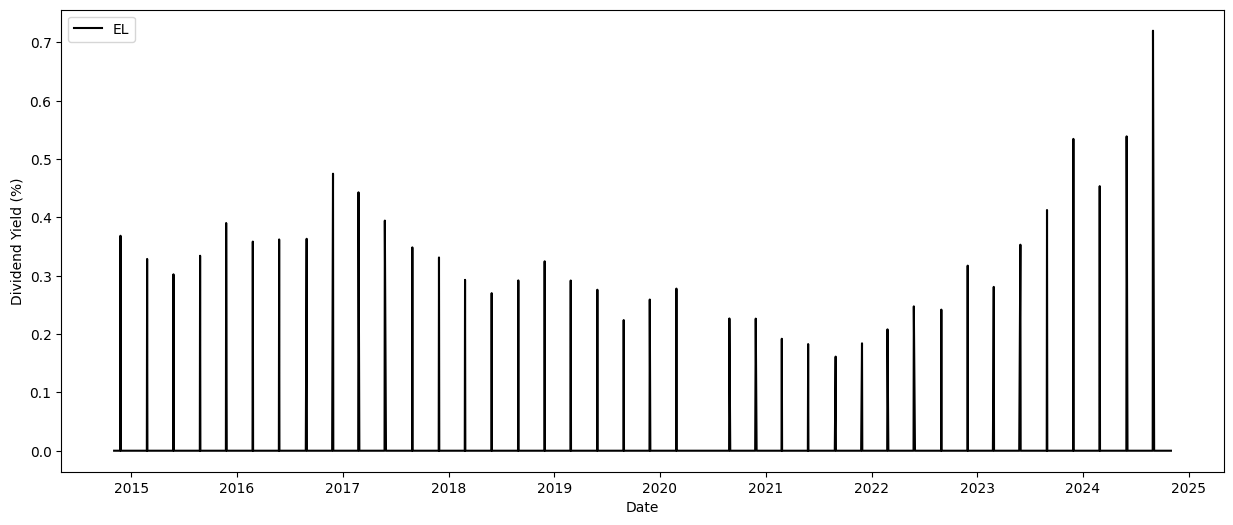

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


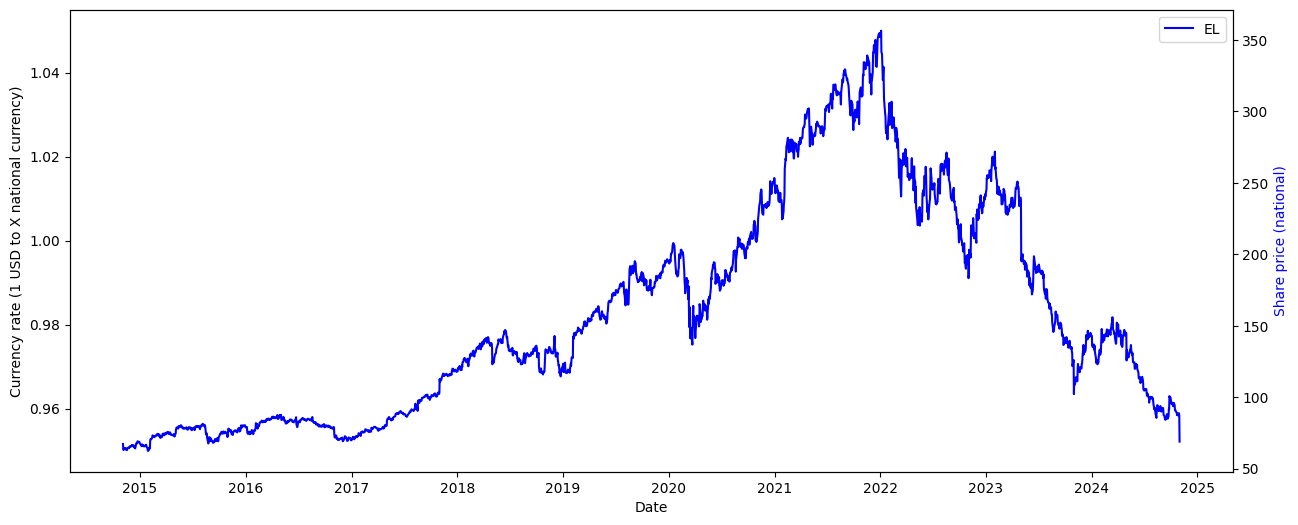

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

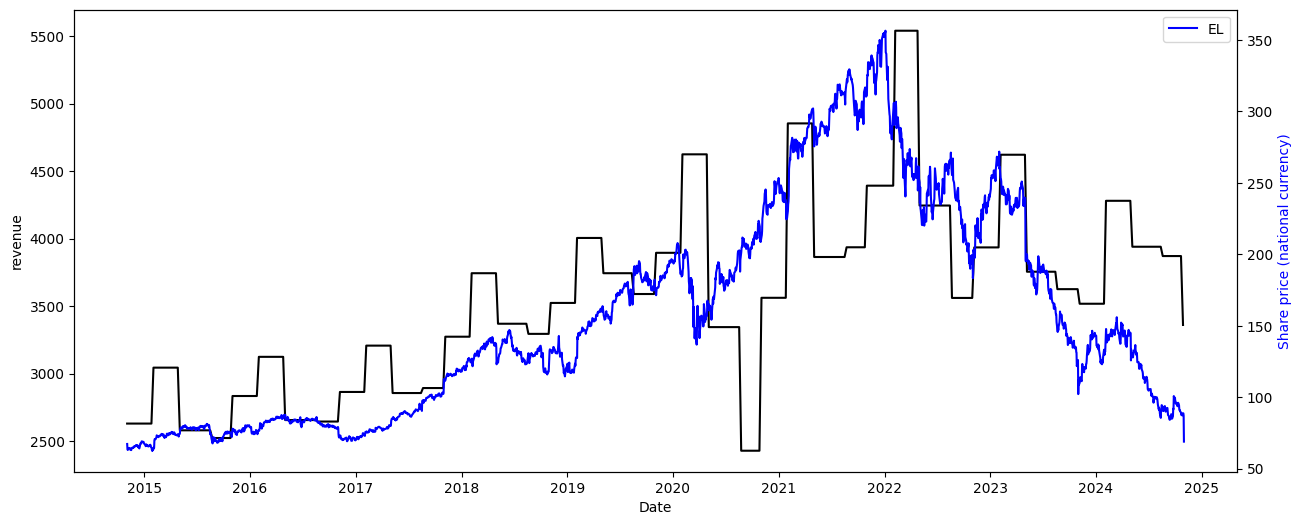

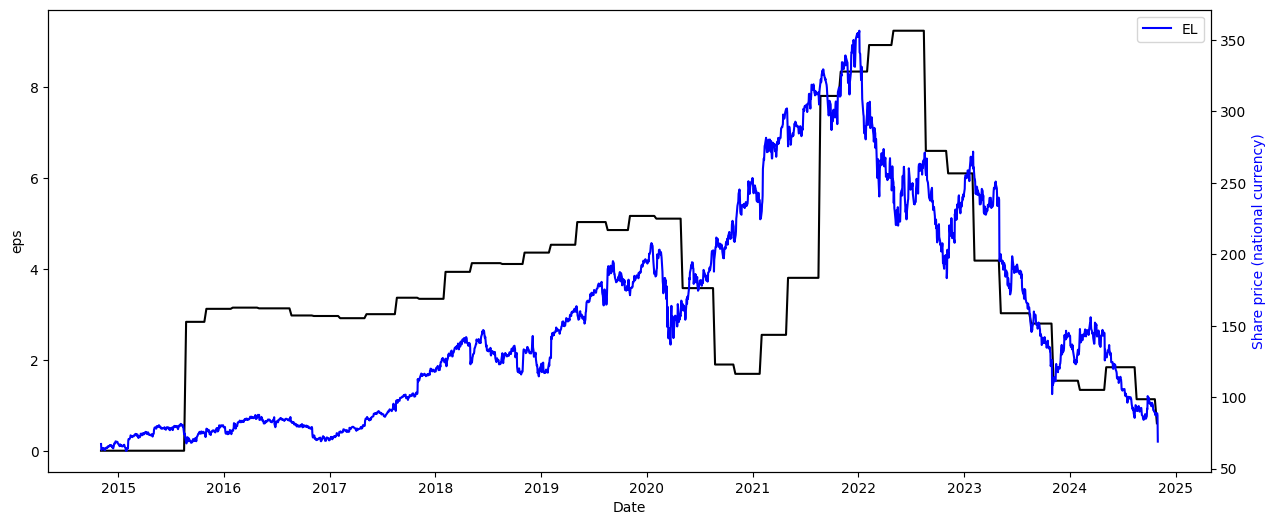

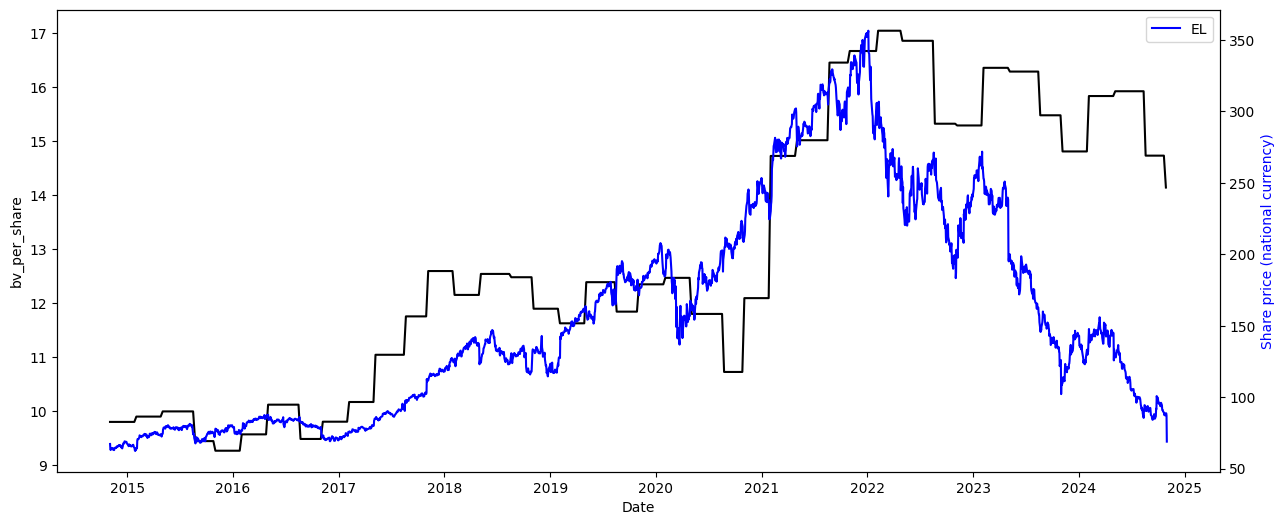

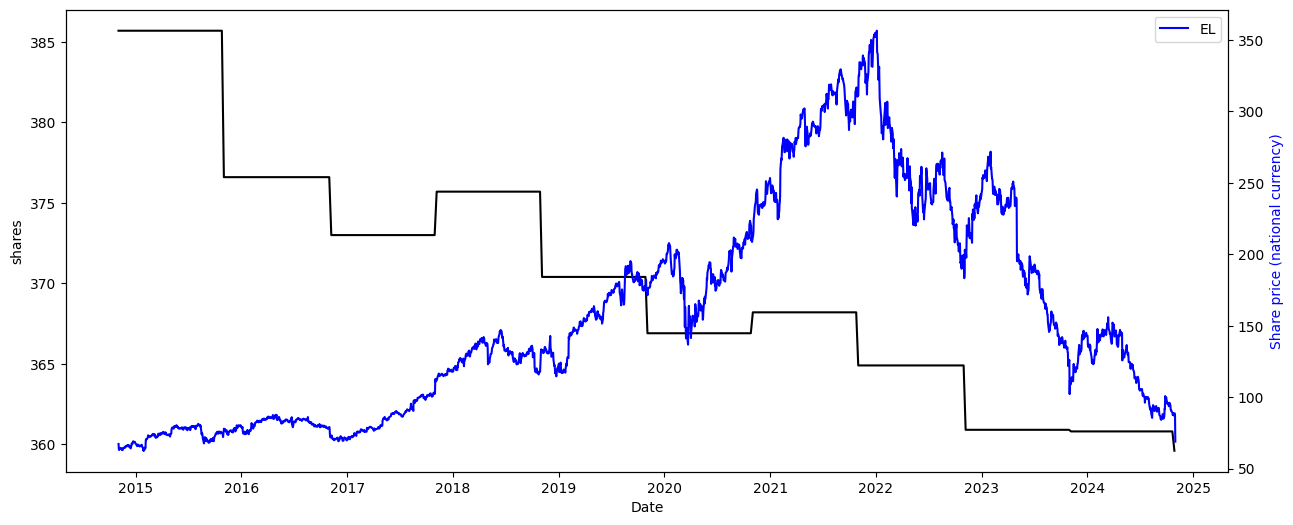

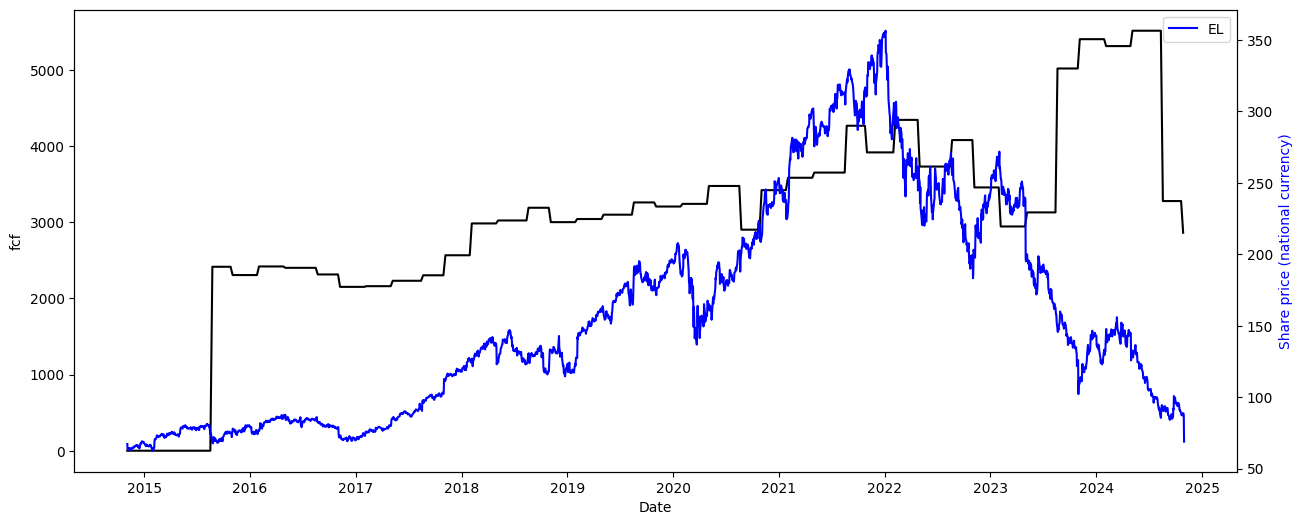

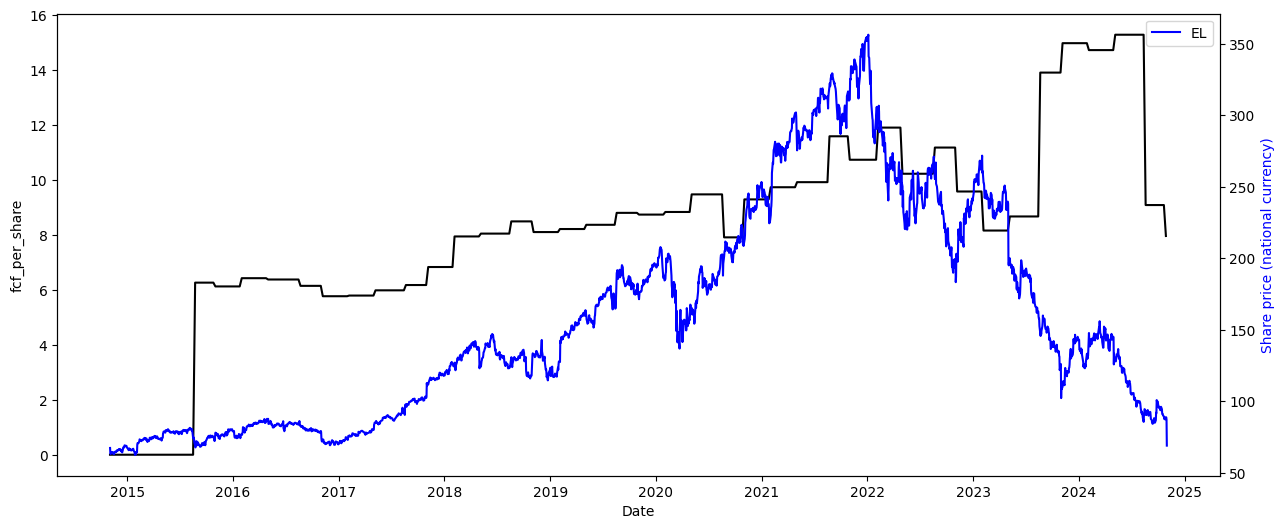

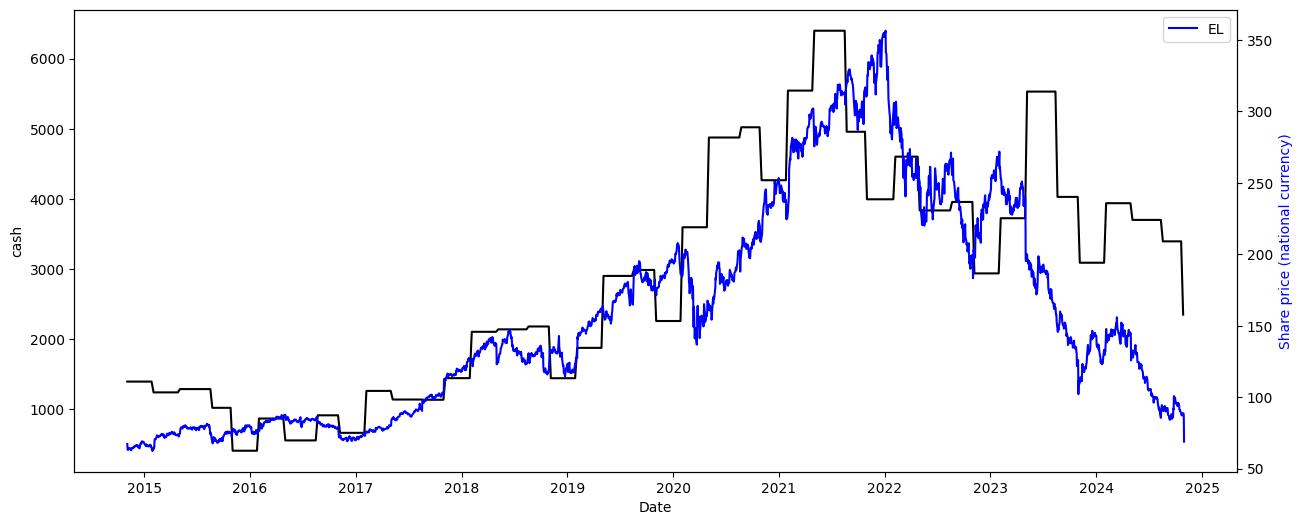

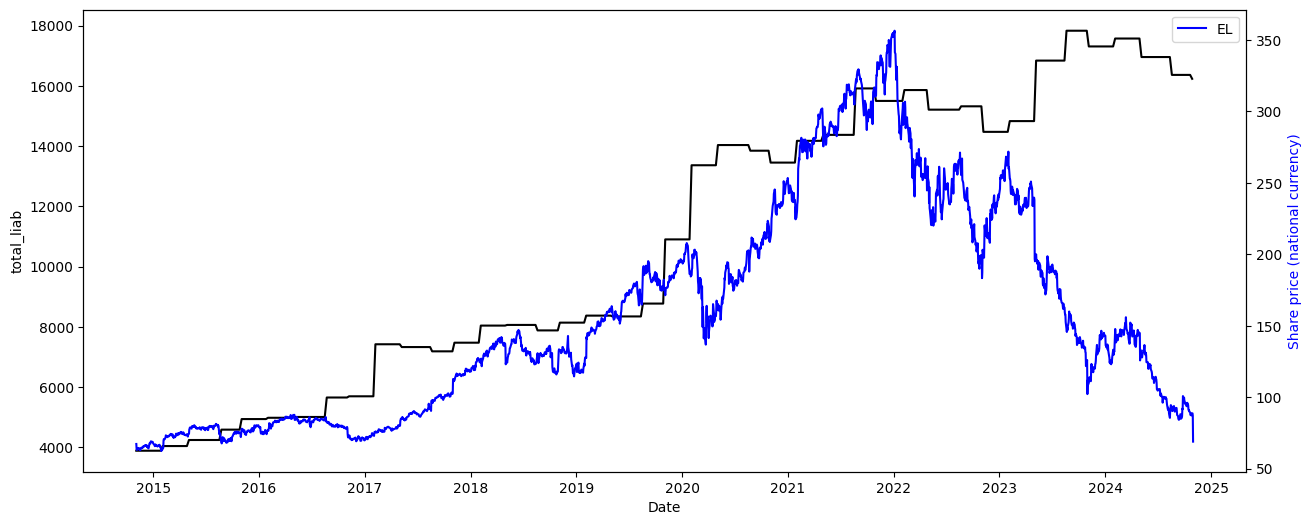

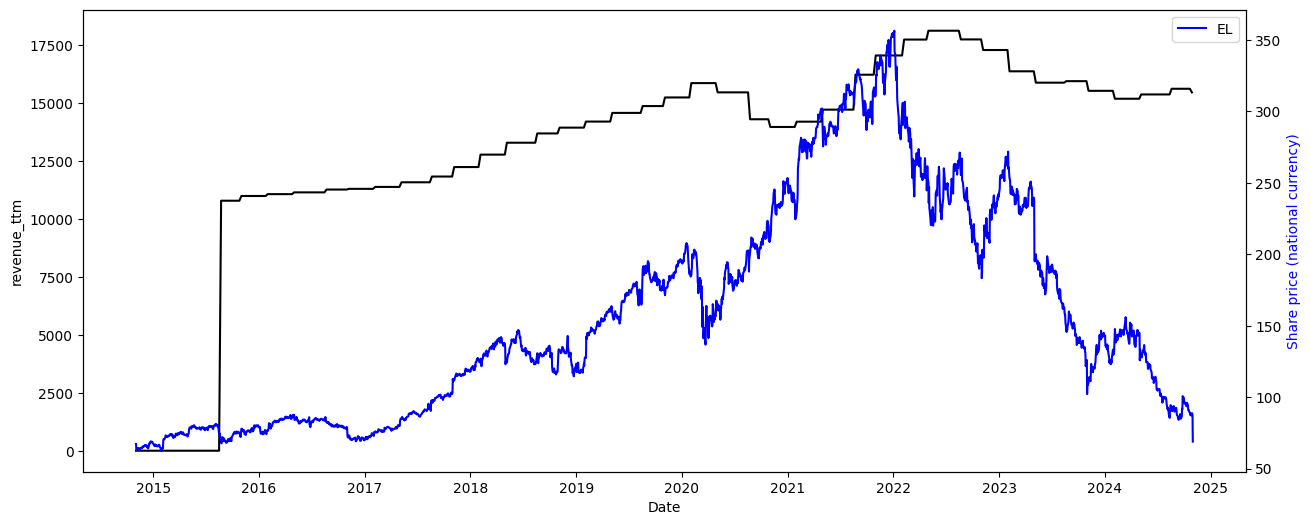

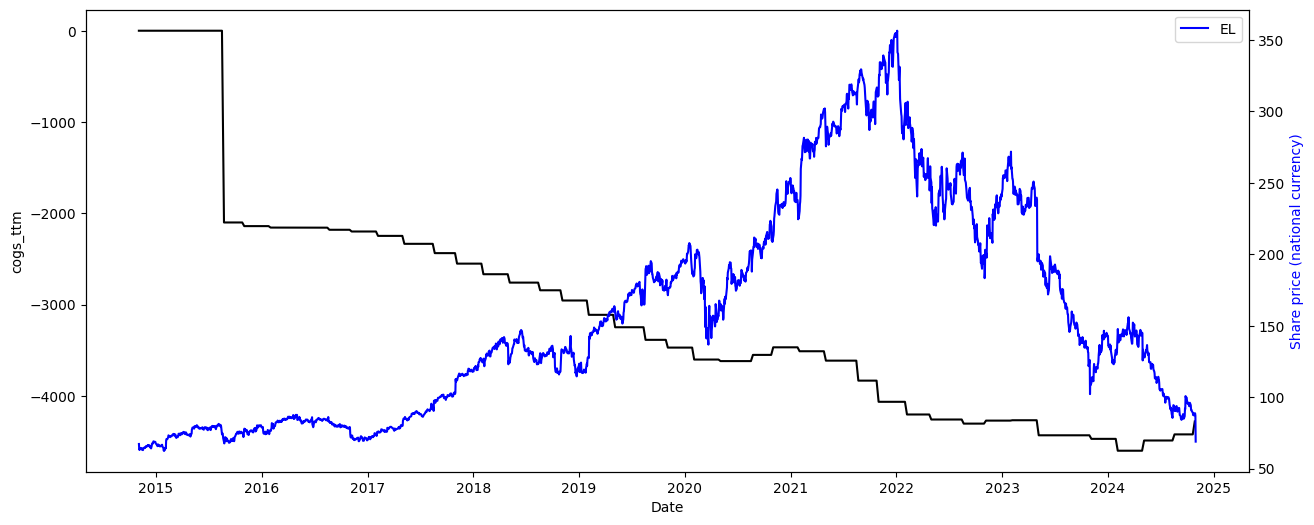

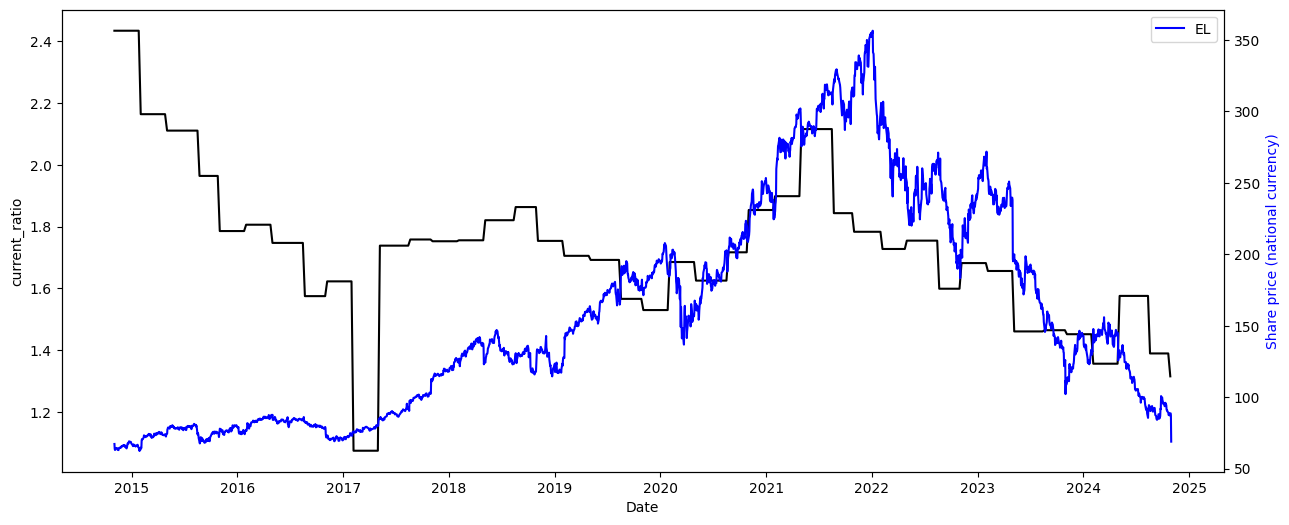

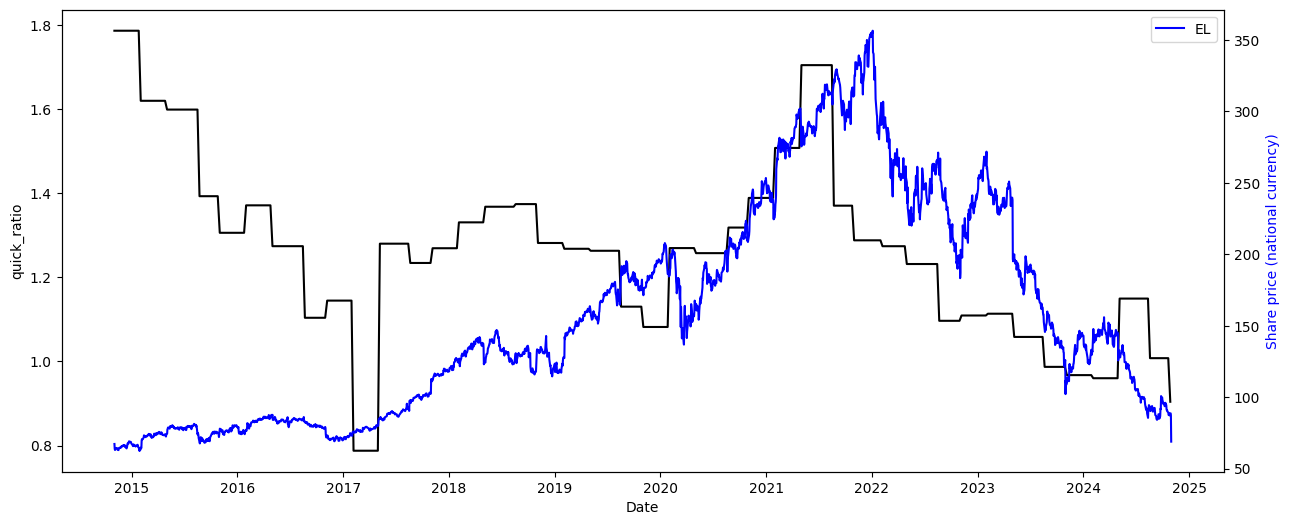

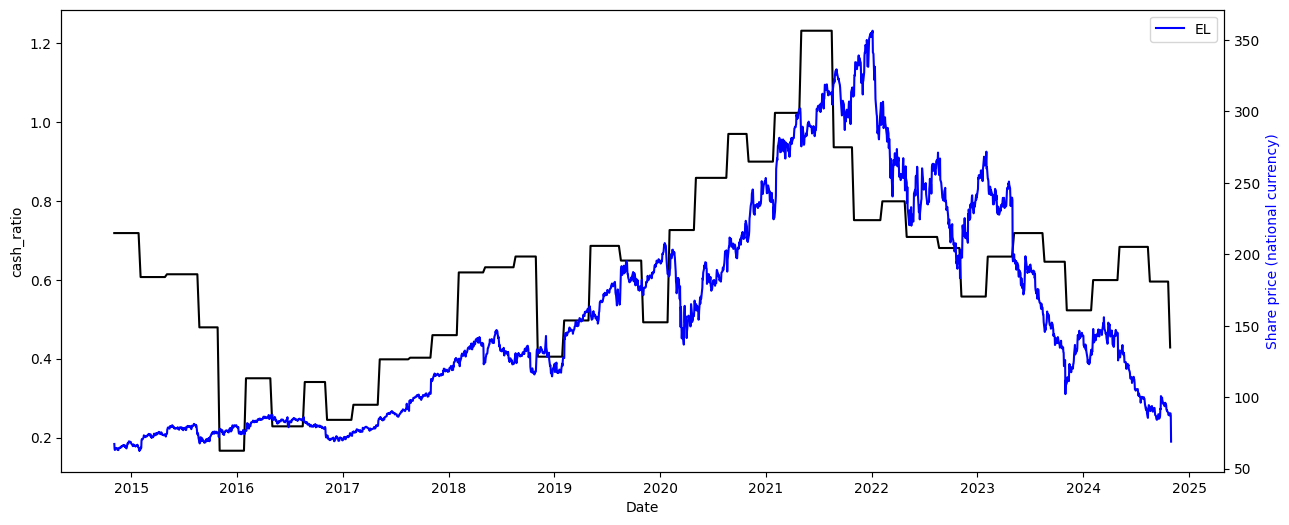

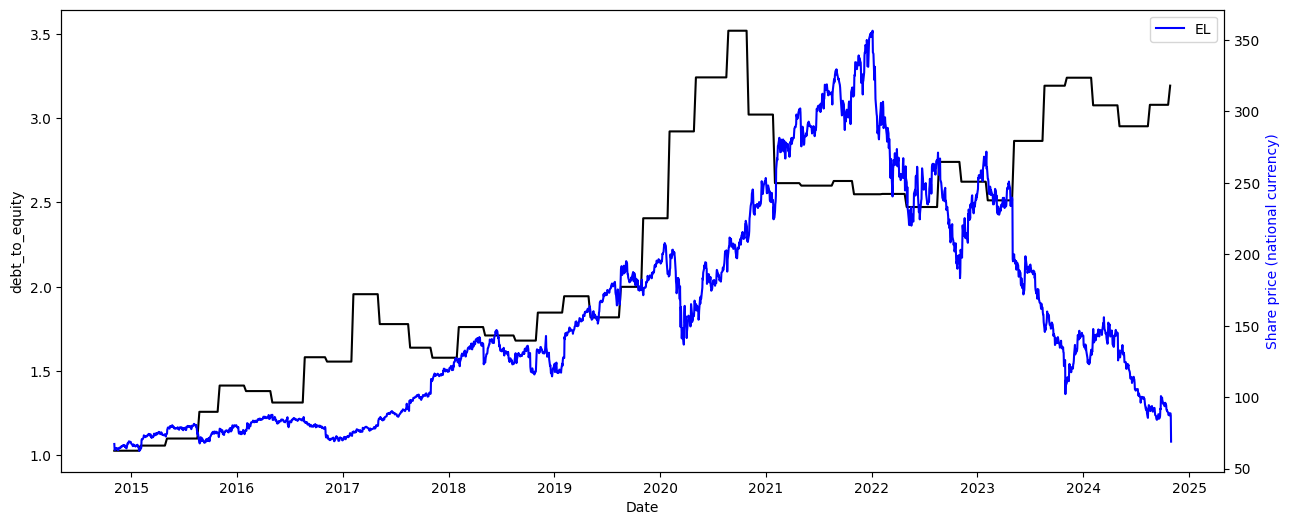

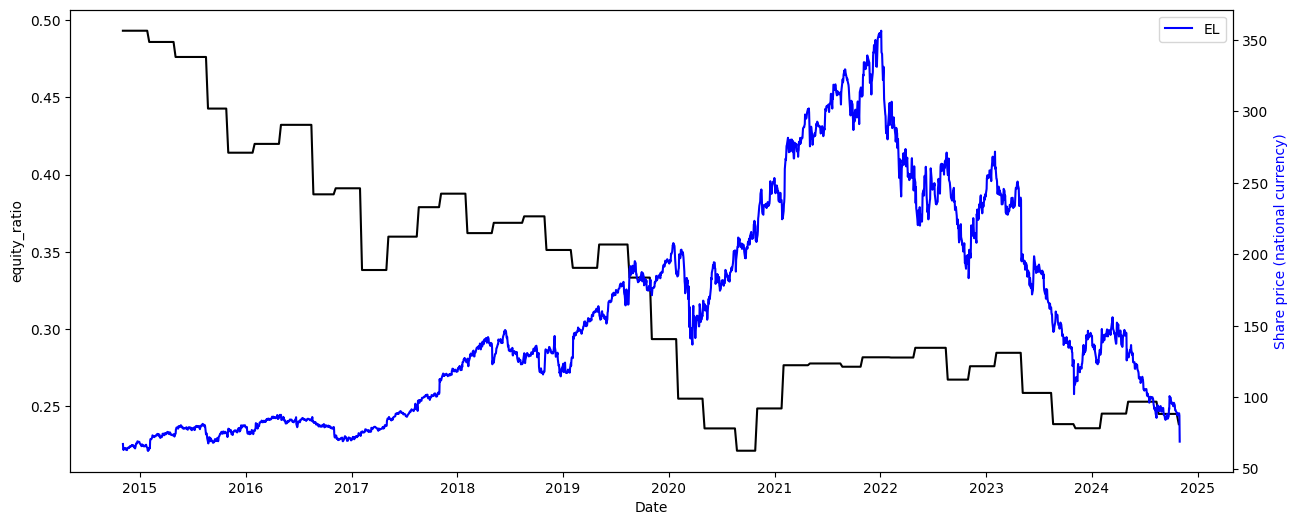

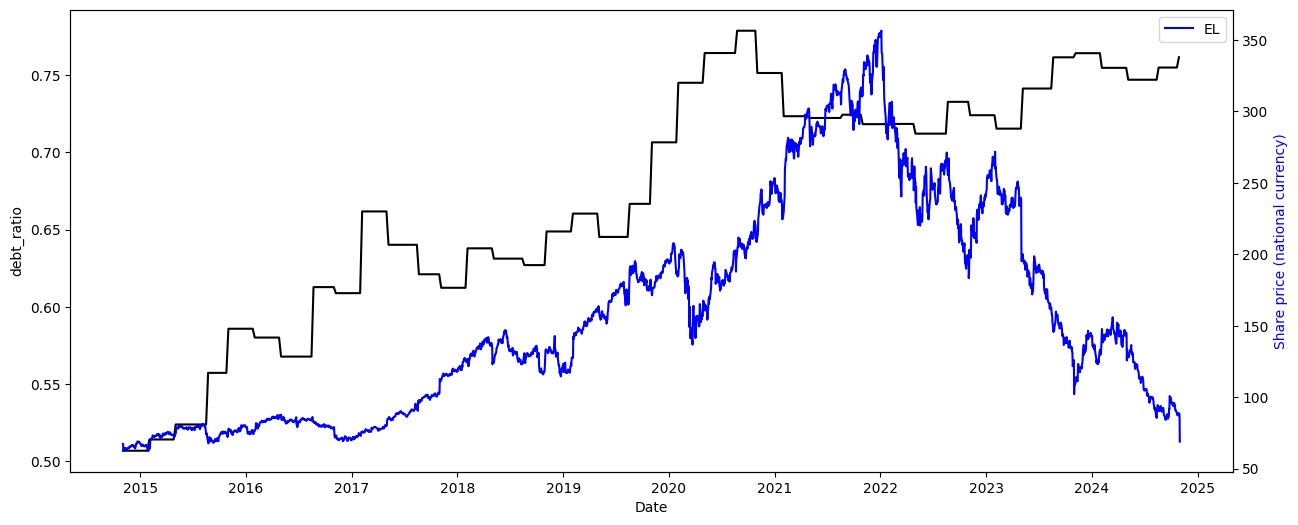

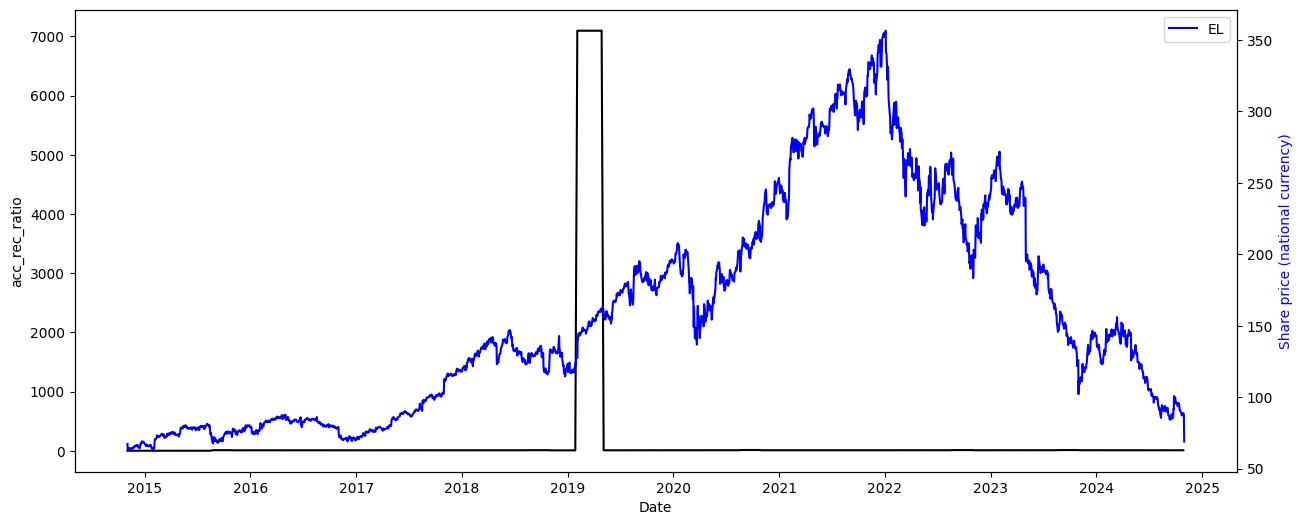

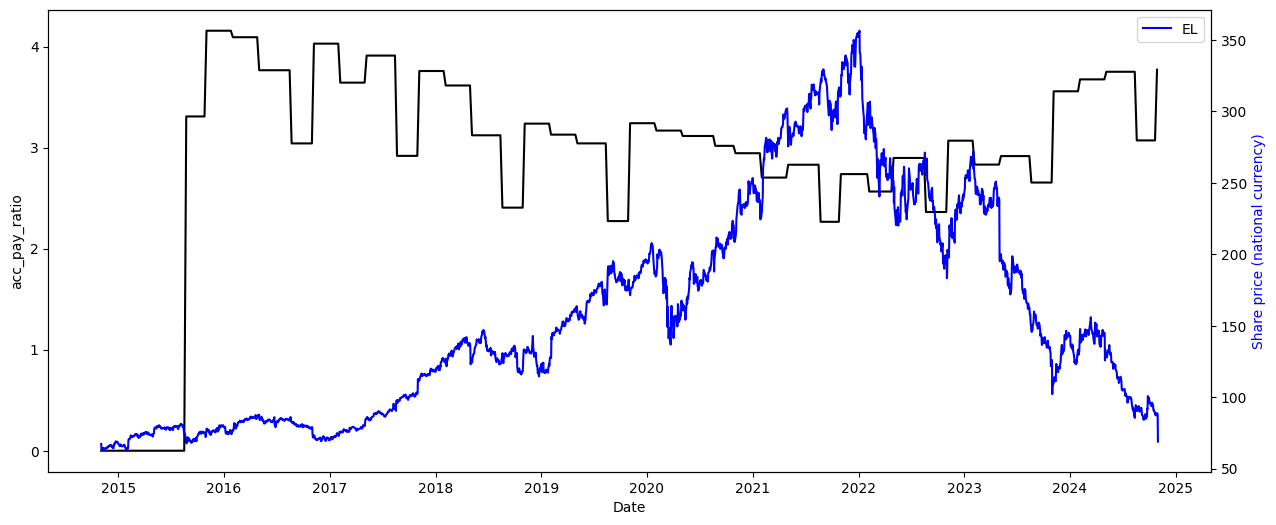

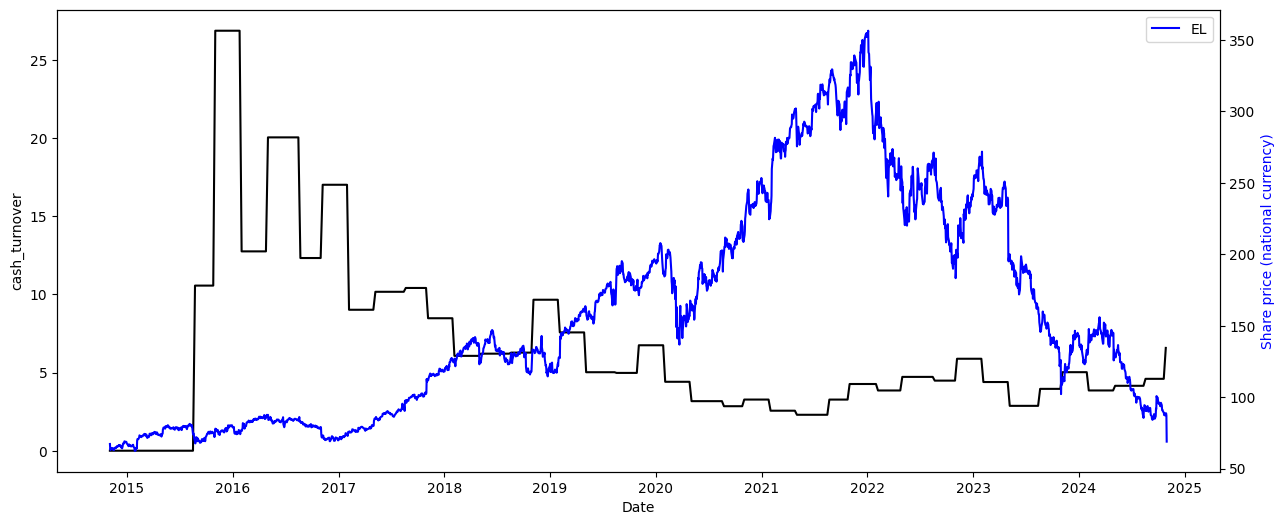

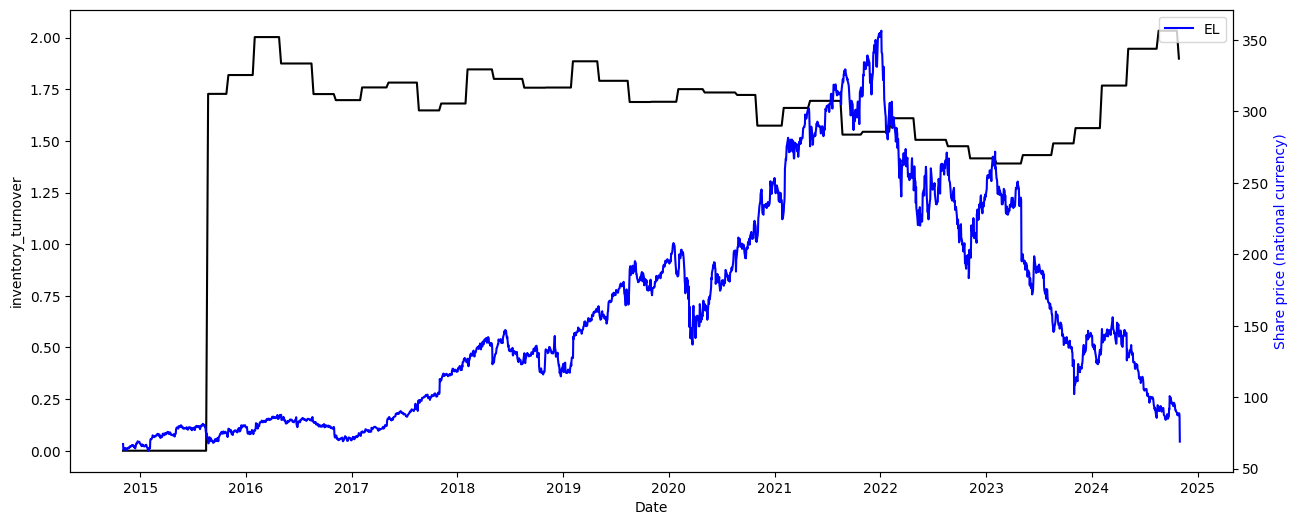

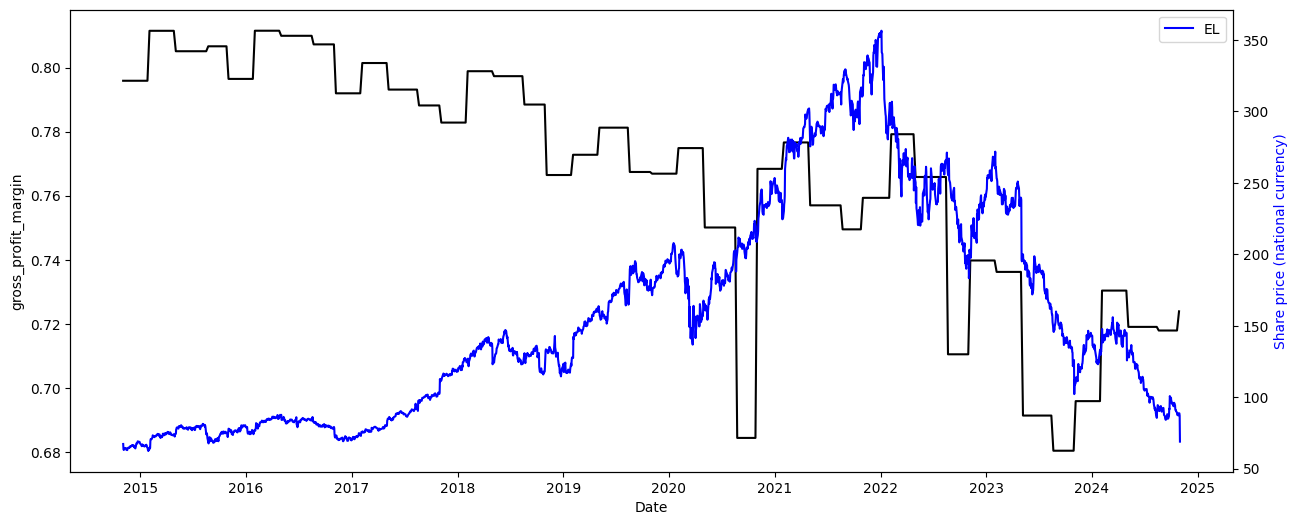

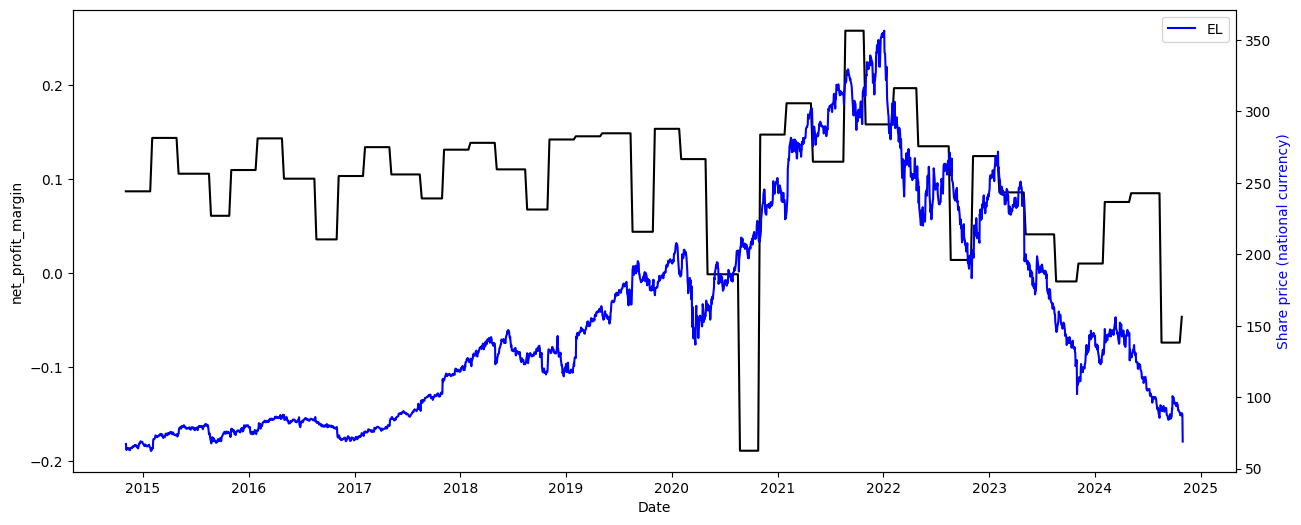

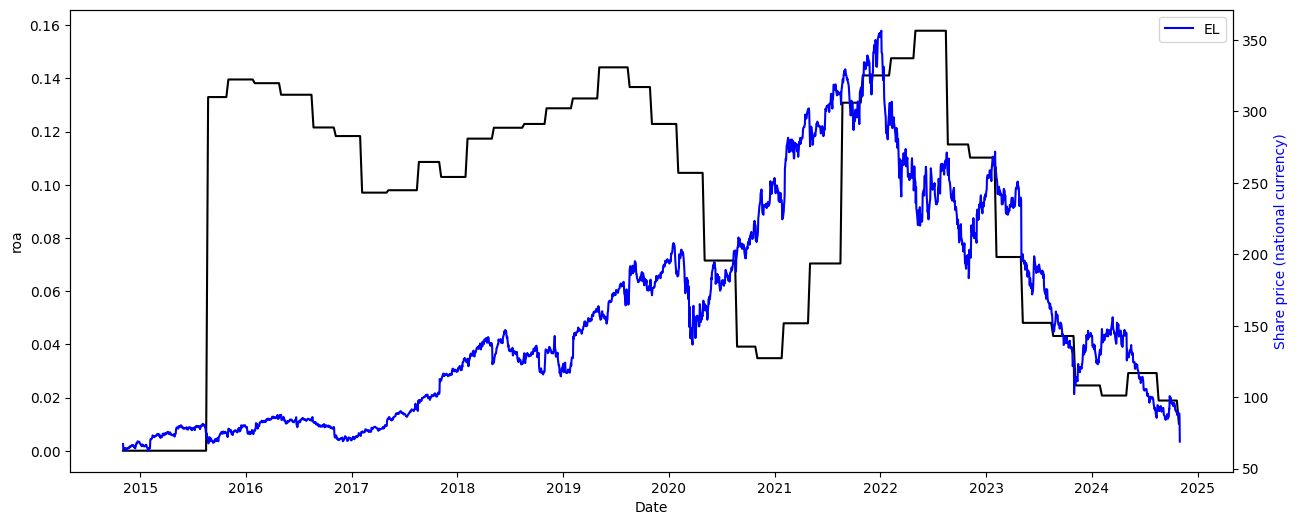

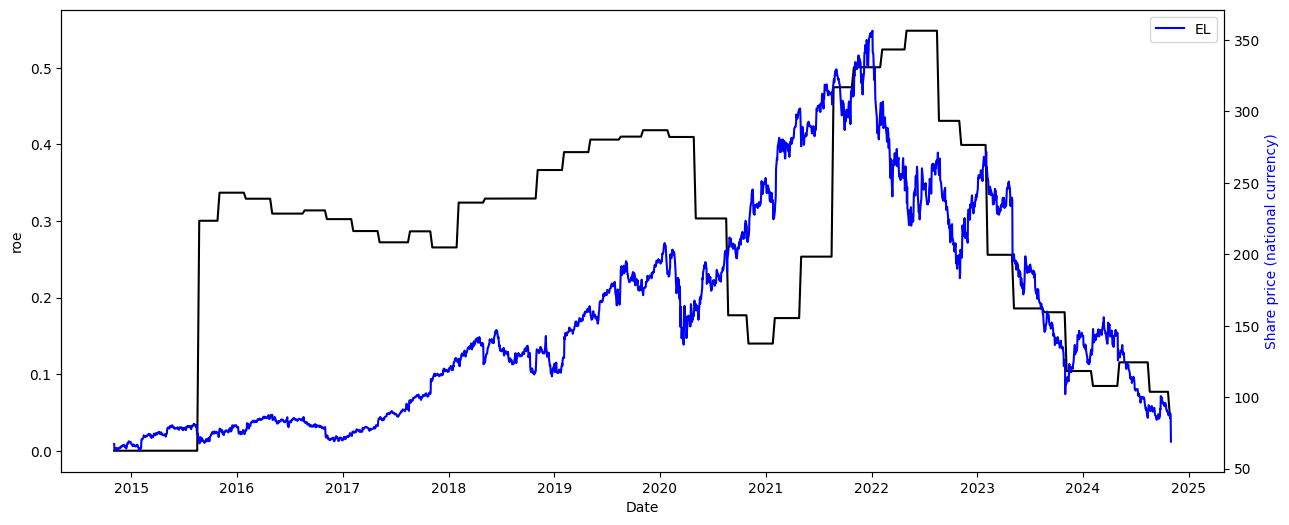

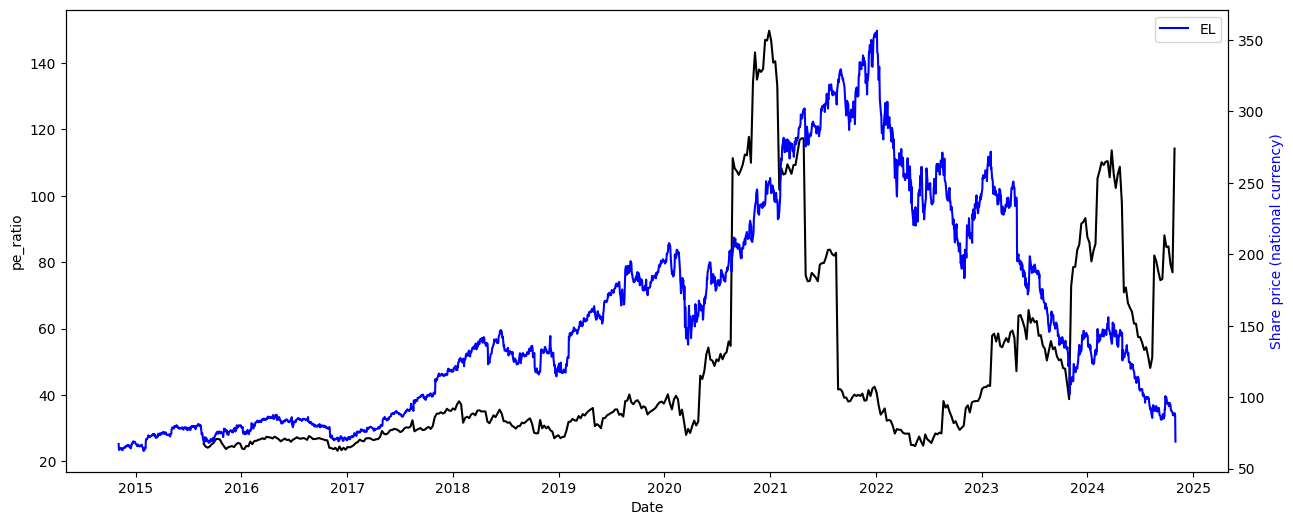

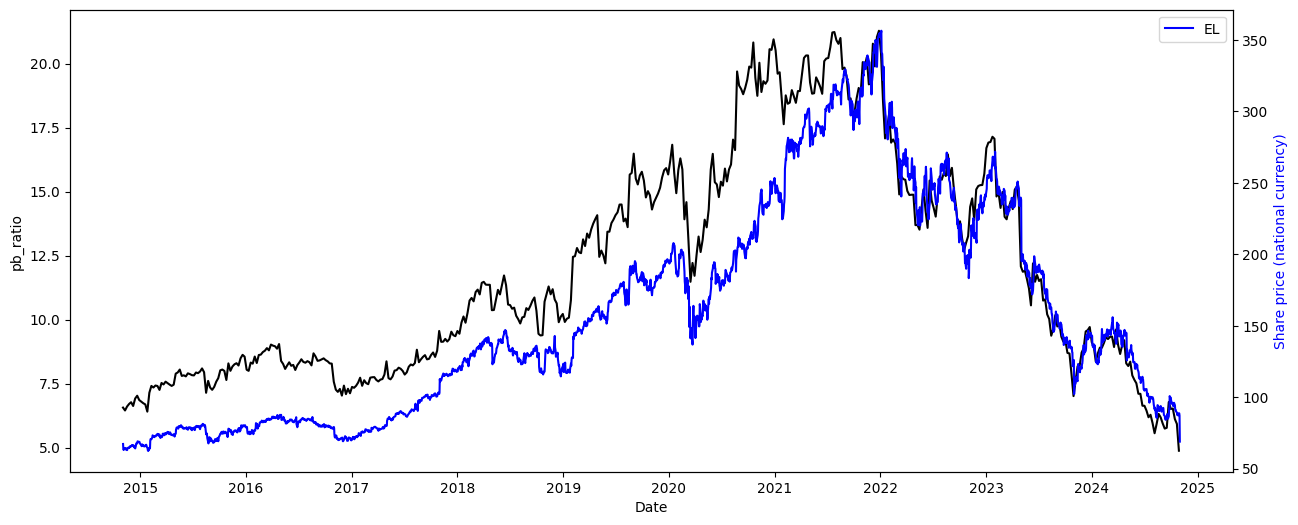

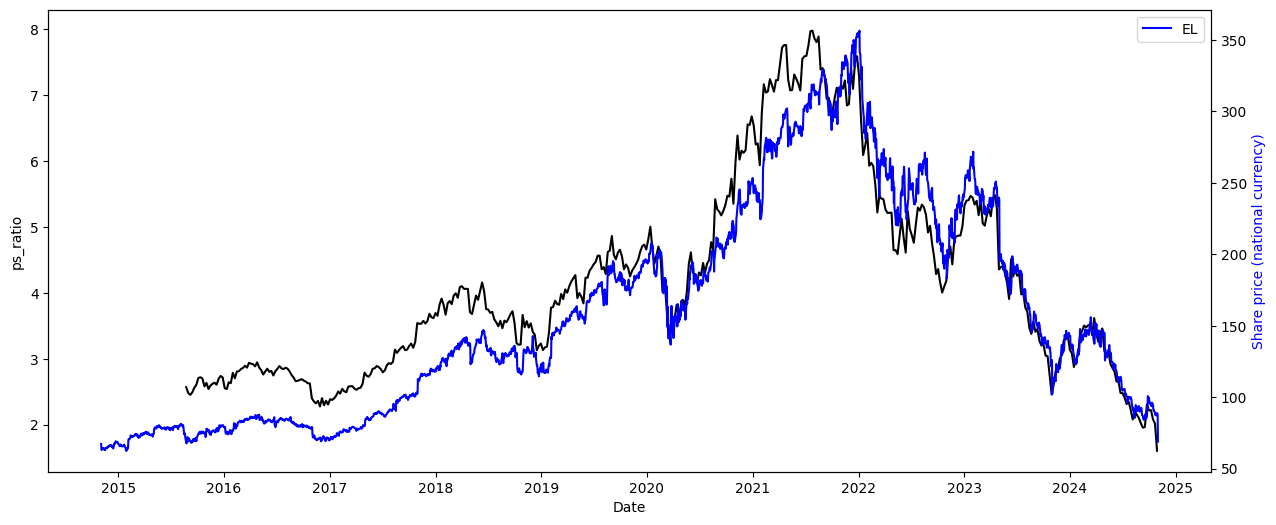

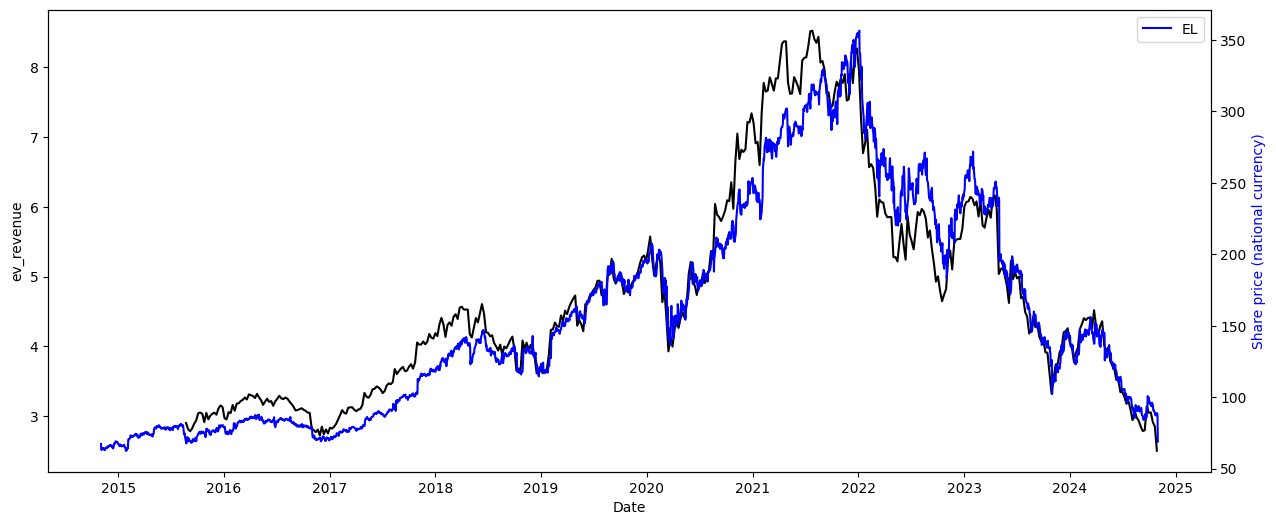

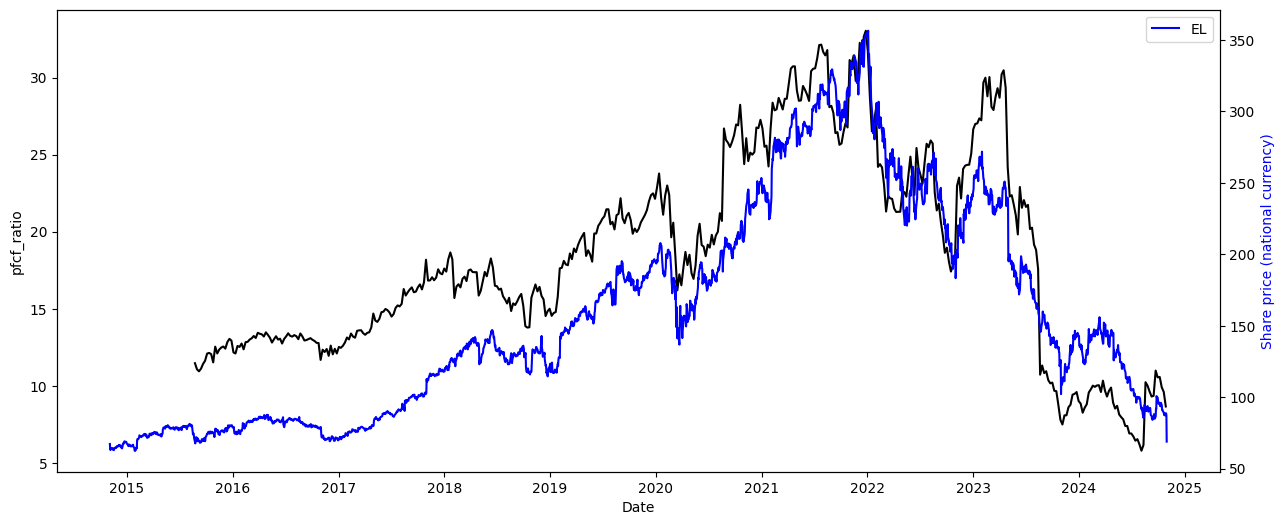

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

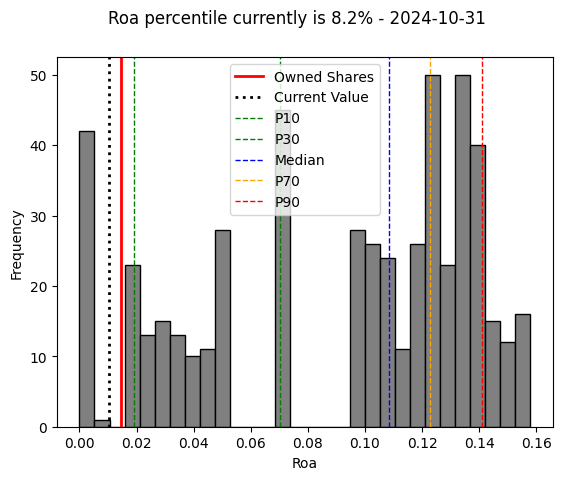

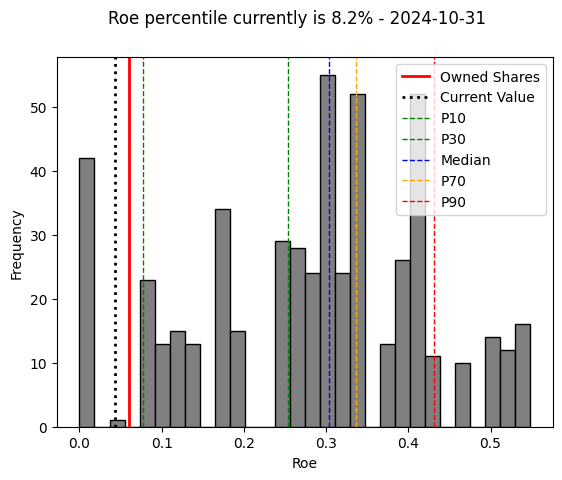

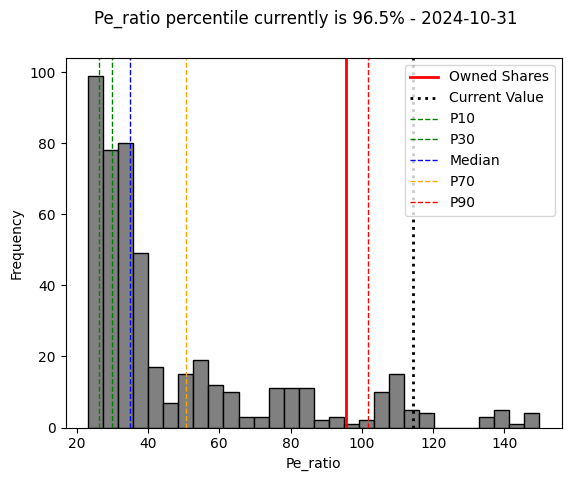

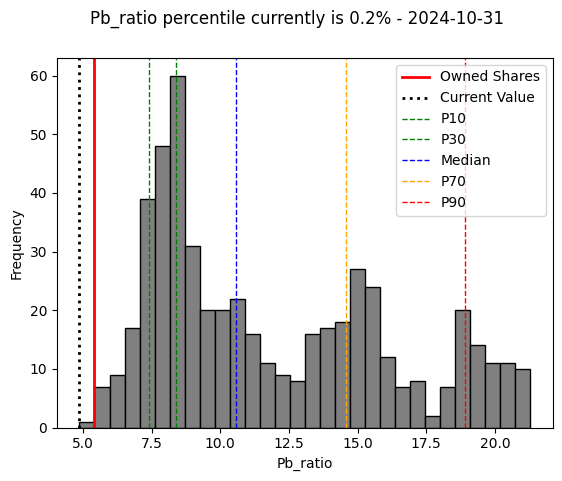

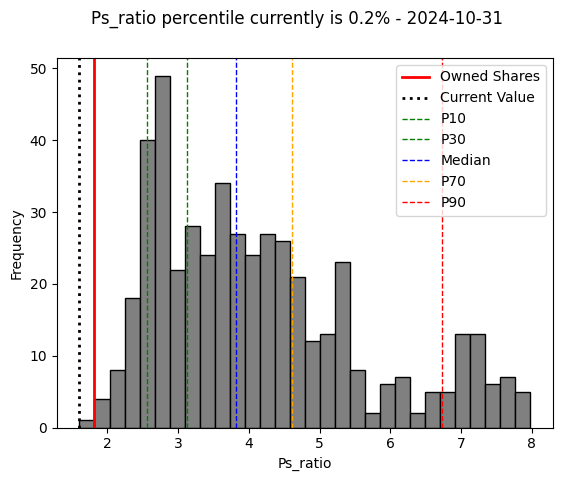

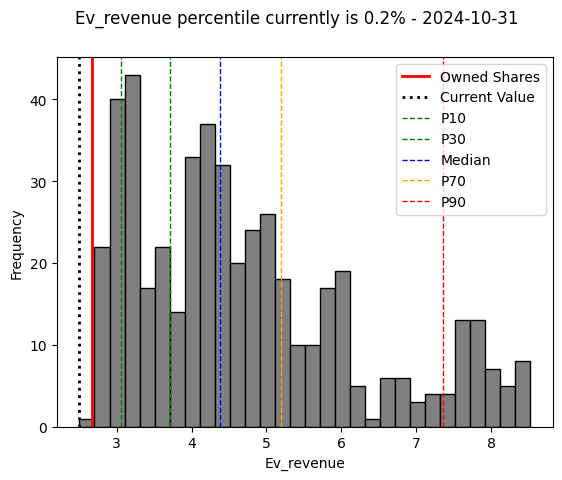

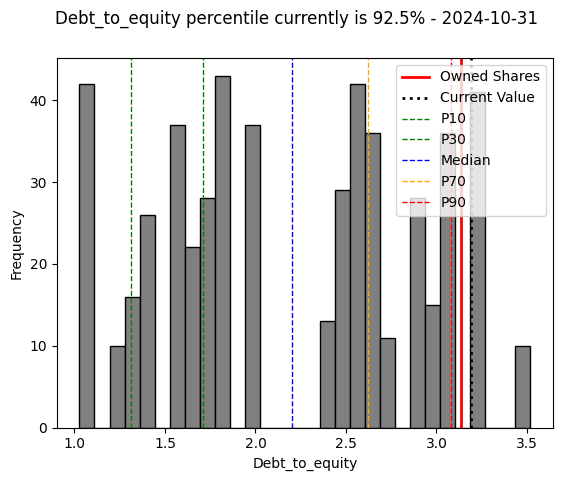

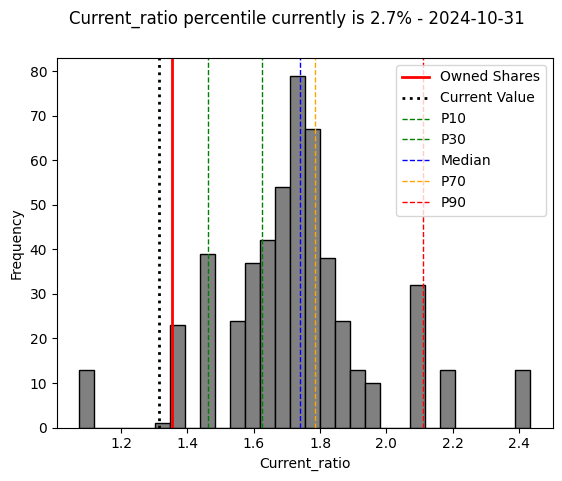

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.931052,-0.810736,0.199145,-0.008028,-0.083895,-0.247009,-0.139501
roe,0.931052,1.000000,-0.684548,0.432925,0.262073,0.209703,0.040351,-0.197077
pe_ratio,-0.810736,-0.684548,1.000000,0.390885,0.408917,0.459062,0.667960,-0.011225
pb_ratio,0.199145,0.432925,0.390885,1.000000,0.956158,0.945900,0.509170,0.108187
ps_ratio,-0.008028,0.262073,0.408917,0.956158,1.000000,0.994777,0.385391,0.485655
ev_revenue,-0.083895,0.209703,0.459062,0.945900,0.994777,1.000000,0.465768,0.431131
debt_to_equity,-0.247009,0.040351,0.667960,0.509170,0.385391,0.465768,1.000000,-0.493769
current_ratio,-0.139501,-0.197077,-0.011225,0.108187,0.485655,0.431131,-0.493769,1.000000


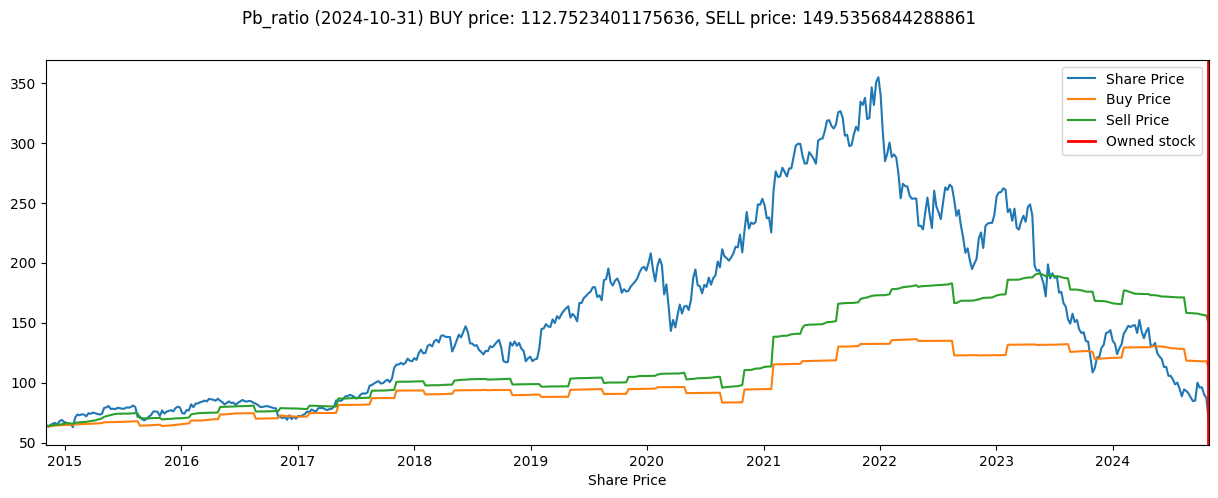

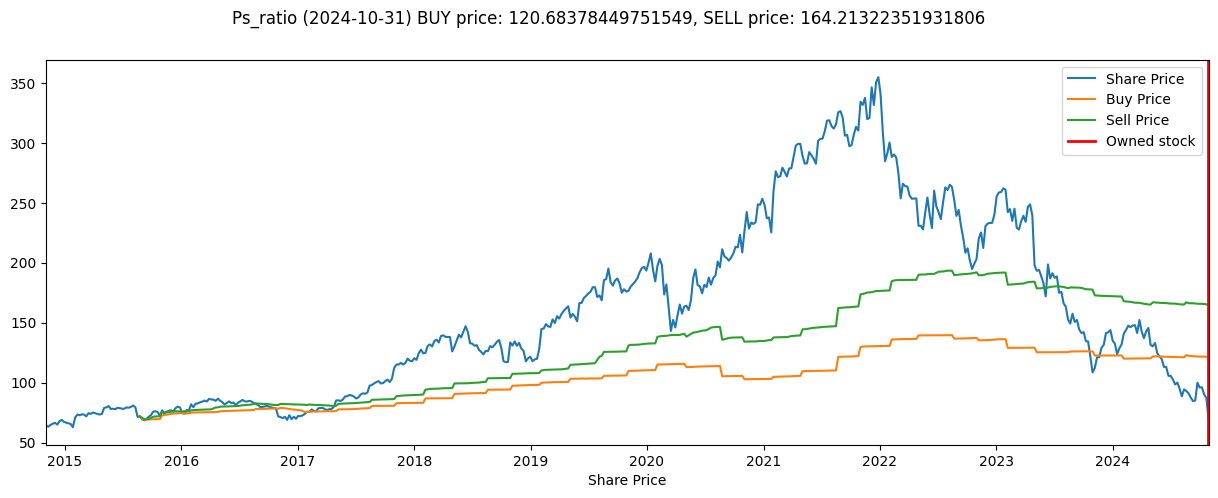

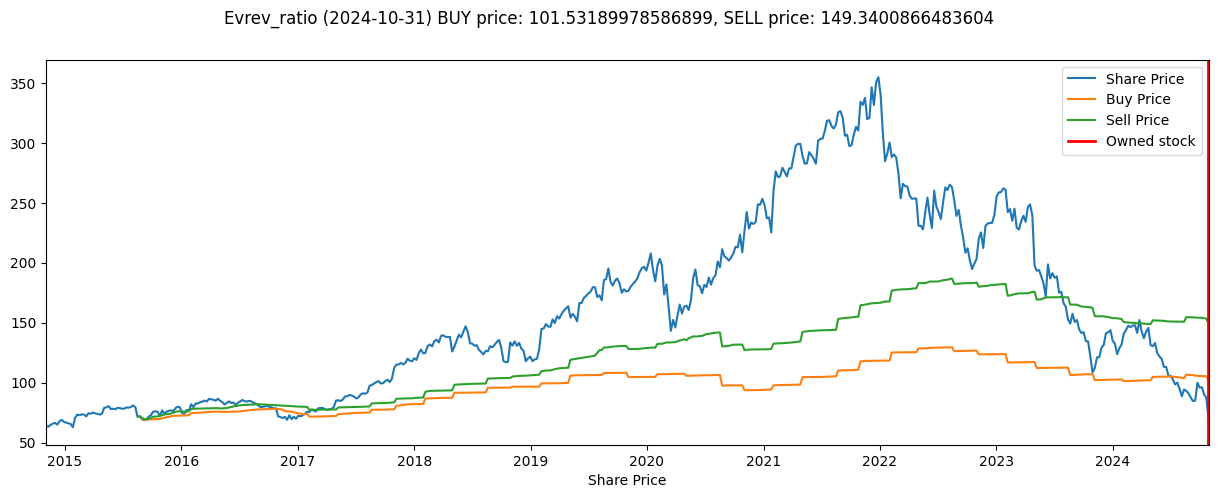

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.2,
    max_pct=0.5,
    owned_shares=owned_shares
)